In [2]:
from tensorflow.keras.layers import Input, SimpleRNN, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD, Adam

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

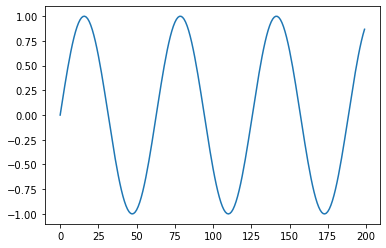

In [3]:
# make the original data (확인용, 예시)
series = np.sin(0.1 * np.arange(200))

# plot it
plt.plot(series)
plt.show()

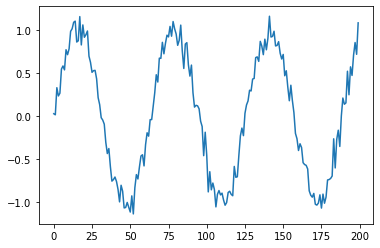

In [4]:
# make the original data (노이즈 추가)
series = np.sin(0.1 * np.arange(200)) + np.random.randn(200) * 0.1

# plot it
plt.plot(series)
plt.show()

In [5]:
### build the dataset
# let's see if we can use T pas values to predict the next value
T =10
X = []
Y = []
for t in range(len(series) - T):
  x = series[t:t+T]
  X.append(x)
  y = series[t+T]
  Y.append(y)

np.array(X).shape

(190, 10)

In [7]:
X = np.array(X).reshape(-1, T, 1) # Now the data should be N x T x D
Y = np.array(Y)
N = len(X)
print("X.shape:", X.shape, ", Y.shape:", Y.shape)

X.shape: (190, 10, 1) , Y.shape: (190,)


In [9]:
### try autoregressive RNN model
i= Input(shape=(T, 1))
# x = SimpleRNN(5, activation='relu')(i)
# x = SimpleRNN(5, activation=None)(i)
# x = SimpleRNN(5)(i)
x = SimpleRNN(5, activation='relu')(i)
x = Dense(1)(x)
model = Model(i, x)
model.compile(
    loss='mse',
    optimizer=Adam(lr=0.1),
)

model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 10, 1)]           0         
                                                                 
 simple_rnn_1 (SimpleRNN)    (None, 5)                 35        
                                                                 
 dense_1 (Dense)             (None, 1)                 6         
                                                                 
Total params: 41
Trainable params: 41
Non-trainable params: 0
_________________________________________________________________


In [10]:

# train the RNN
r = model.fit(
    X[:-N//2], Y[:-N//2],
    epochs=80,
    validation_data=(X[-N//2:], Y[-N//2:]),
)

Epoch 1/80
3/3 [==============================] - 1s 83ms/step - loss: 0.8853 - val_loss: 0.7728
Epoch 2/80
3/3 [==============================] - 0s 14ms/step - loss: 0.6242 - val_loss: 0.6103
Epoch 3/80
3/3 [==============================] - 0s 15ms/step - loss: 0.4994 - val_loss: 0.4624
Epoch 4/80
3/3 [==============================] - 0s 12ms/step - loss: 0.4128 - val_loss: 0.3691
Epoch 5/80
3/3 [==============================] - 0s 13ms/step - loss: 0.3387 - val_loss: 0.2615
Epoch 6/80
3/3 [==============================] - 0s 14ms/step - loss: 0.2415 - val_loss: 0.1480
Epoch 7/80
3/3 [==============================] - 0s 13ms/step - loss: 0.1286 - val_loss: 0.0638
Epoch 8/80
3/3 [==============================] - 0s 13ms/step - loss: 0.0502 - val_loss: 0.0519
Epoch 9/80
3/3 [==============================] - 0s 53ms/step - loss: 0.0697 - val_loss: 0.0980
Epoch 10/80
3/3 [==============================] - 0s 31ms/step - loss: 0.0992 - val_loss: 0.0974
Epoch 11/80
3/3 [============

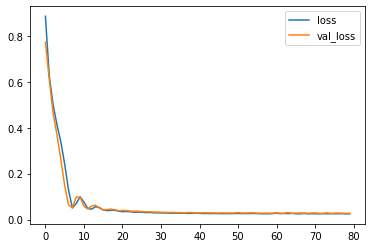

In [11]:
# Plot loss per iteration
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

In [12]:
# "Wrong" forecast using true targets
validation_target = Y[-N//2:]
validation_predictions = []

# input of first vlidation input
i = -N//2

while len(validation_predictions) < len(validation_target):
  p = model.predict(X[i].reshape(1, -1, 1))[0,0] # 1x1 array -> scalar
  i += 1

  # update the predictions list
  validation_predictions.append(p)

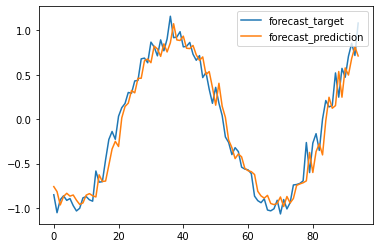

In [13]:
plt.plot(validation_target, label='forecast_target')
plt.plot(validation_predictions, label='forecast_prediction')
plt.legend()

In [ ]:
# Forecast future values (use only self-predictions for making future predictions)
validation_target = Y[-N//2:]
validation_predictions = []

# last train input
last_x = X[-N//2] # 1-D array of length T

while len(validation_predictions) < len(validation_target):
    p = model.predict(last_x.reshape(1, -1, 1))[0,0] # 1x1 array -> scalar

    # update the predictions list
    validation_predictions.append(p)

    # make the new input
    last_x = np.roll(last_x, -1)
    print(last_x)
    last_x[-1] = p

In [ ]:
plt.plot(validation_target, label='forecast_target')
plt.plot(validation_predictions, label='forecast_prediction')
plt.legend()